# 📊 Exploratory Data Analysis on Retail Data (Sample Superstore)

**Internship Program:** TechNest Intern  
**Domain:** Data Analytics  
**Dataset Used:** Sample Superstore Dataset  
**Author:** Ayushi Karn  

---

### 📘 About this Notebook
In this notebook, we have performed **Exploratory Data Analysis (EDA)** on the *Sample Superstore dataset*.  
The goal is to explore sales and profit patterns, understand customer behaviour, and uncover useful insights that can guide business decisions.


In [1]:
# At first we are importing the libraries we'll use throughout the project:
import pandas as pd
import numpy as np

# The csv file is not directly in UTF-8 form so we will try two diff ways to open and read it:

# Trying Latin-1 first:
try:
    df = pd.read_csv("data/SampleSuperstore.csv", encoding="latin-1")
    print("Loaded with latin-1 ✅")
except:
    # If that fails, then we try Windows-1252 (that is - ISO-8859-1):
    df = pd.read_csv("data/SampleSuperstore.csv", encoding="ISO-8859-1")
    print("Loaded with ISO-8859-1 ✅")

# Now for checking that our dataset gets loaded or not we run this command to show first 5 rows

df.head()


Loaded with latin-1 ✅


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# Here we are hiding unnecessary warnings that will appear ahead.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Now to check the names of all the columns we have in our dataset :

df.columns.tolist()


['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [4]:
# Now to check data types in all the columns :

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Here we convert Order Date and Ship Date into proper datetime format:

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Now we check a few rows to confirm the change that we made:

df[['Order Date','Ship Date']].head()


,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


In [6]:
# Now to extract Year and Month from Order Date:

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.strftime("%B")

# Then to calculate Shipping delay in days (Ship Date - Order Date):

df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Final Quick check before we move ahead 
df[['Order Date','Ship Date','Order Year','Order Month Name','Shipping Delay']].head()


,Order Date,Ship Date,Order Year,Order Month Name,Shipping Delay
0,2016-11-08,2016-11-11,2016,November,3
1,2016-11-08,2016-11-11,2016,November,3
2,2016-06-12,2016-06-16,2016,June,4
3,2015-10-11,2015-10-18,2015,October,7
4,2015-10-11,2015-10-18,2015,October,7


In [7]:
# Here we check if our dataset has any missing values:

df.isnull().sum()

# If missing values exist then to quickly see the percentage of missing data (for each column):

(df.isnull().sum() / len(df)) * 100


Row ID              0.0
Order ID            0.0
Order Date          0.0
Ship Date           0.0
Ship Mode           0.0
Customer ID         0.0
Customer Name       0.0
Segment             0.0
Country             0.0
City                0.0
State               0.0
Postal Code         0.0
Region              0.0
Product ID          0.0
Category            0.0
Sub-Category        0.0
Product Name        0.0
Sales               0.0
Quantity            0.0
Discount            0.0
Profit              0.0
Order Year          0.0
Order Month         0.0
Order Month Name    0.0
Shipping Delay      0.0
dtype: float64

In [8]:
# Now we check how many duplicate rows are in there in dataset:

df.duplicated().sum()

# If duplicates exist, we can remove them by:

df = df.drop_duplicates()

# And now if any row is romoved then double check after removing it:

df.duplicated().sum()


np.int64(0)

In [9]:
# Now we quickly check some basic statistics of numerical columns like Sales, Quantity, Discount, Profit:

df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()


,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Here let's see what unique values we have in some important categorical columns:

print("Different shipping modes available:", df['Ship Mode'].unique())
print("Different customer segments available:", df['Segment'].unique())
print("Different regions available:", df['Region'].unique())
print("Different product categories available:", df['Category'].unique())

Different shipping modes available: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Different customer segments available: ['Consumer' 'Corporate' 'Home Office']
Different regions available: ['South' 'West' 'Central' 'East']
Different product categories available: ['Furniture' 'Office Supplies' 'Technology']


In [11]:
# Here we will create some new useful columns for our analysis:

# Extracting Year and Month from the Order Date:

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()

# Calculating shipping delay (difference between Ship Date and Order Date):

df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# We check the first 5 rows to confirm our new created columns:

df[['Order Date', 'Ship Date', 'Order Year', 'Order Month', 'Order Month Name', 'Shipping Delay']].head()


,Order Date,Ship Date,Order Year,Order Month,Order Month Name,Shipping Delay
0,2016-11-08,2016-11-11,2016,11,November,3
1,2016-11-08,2016-11-11,2016,11,November,3
2,2016-06-12,2016-06-16,2016,6,June,4
3,2015-10-11,2015-10-18,2015,10,October,7
4,2015-10-11,2015-10-18,2015,10,October,7


              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


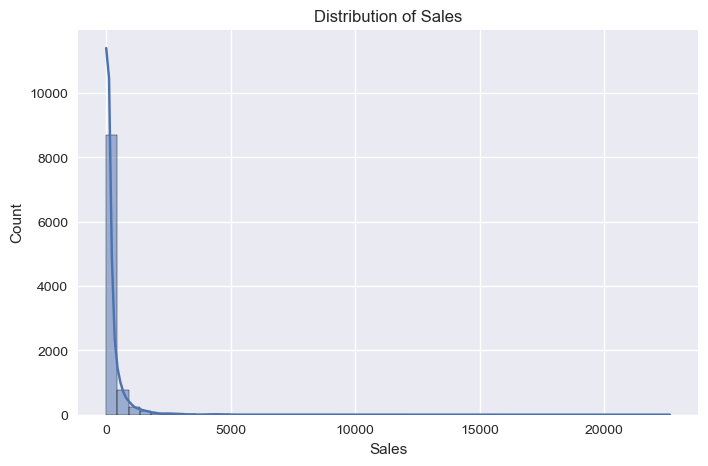

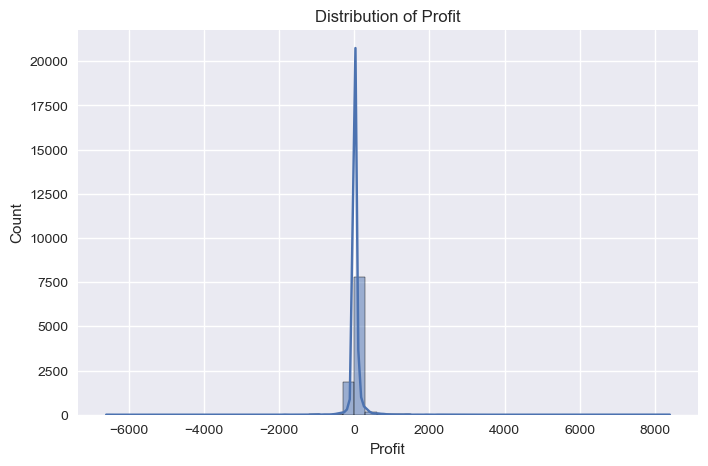

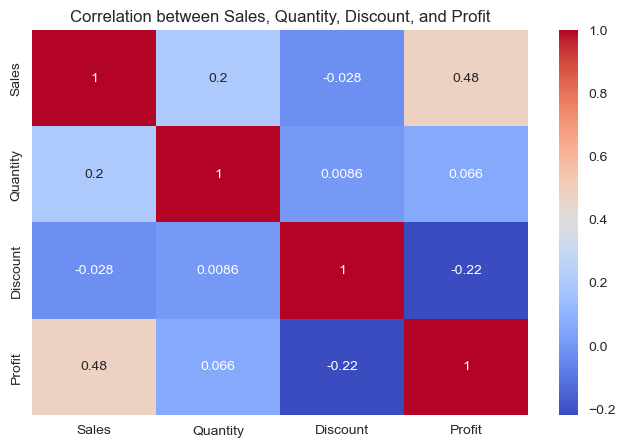

In [12]:
# Now for simple and clean visualizations:

import matplotlib.pyplot as plt
import seaborn as sns

# We Set style for better visuals:

plt.style.use("seaborn-v0_8")

# --- 1. Basic statistics for numerical columns ---

print(df[['Sales','Quantity','Discount','Profit']].describe())

# --- 2. To get a histogram of Distribution of Sales ---

plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.show()

# --- 3. To get a histogram of Distribution of Profit ---

plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title("Distribution of Profit")
plt.show()

# --- 4. To get Correlation Heatmap ---

plt.figure(figsize=(8,5))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Sales, Quantity, Discount, and Profit")
plt.show()


In [13]:
# Here we calculate some important KPIs for our dataset:

# For Total Sales:

total_sales = df['Sales'].sum()

# For Total Profit:

total_profit = df['Profit'].sum()

# For Total Quantity Sold:

total_quantity = df['Quantity'].sum()

# For Total Number of Orders (using unique Order IDs):

total_orders = df['Order ID'].nunique()

# For Total Number of Customers (using unique Customer IDs):

total_customers = df['Customer ID'].nunique()

# Now finally we print all the data nicely below:

print("📊 Key Performance Indicators (KPIs):")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")


📊 Key Performance Indicators (KPIs):
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37873
Total Orders: 5009
Total Customers: 793


👉 From the above Key Performance Indicators (KPIs), we can infer that the company has a healthy customer base with consistent sales volume.

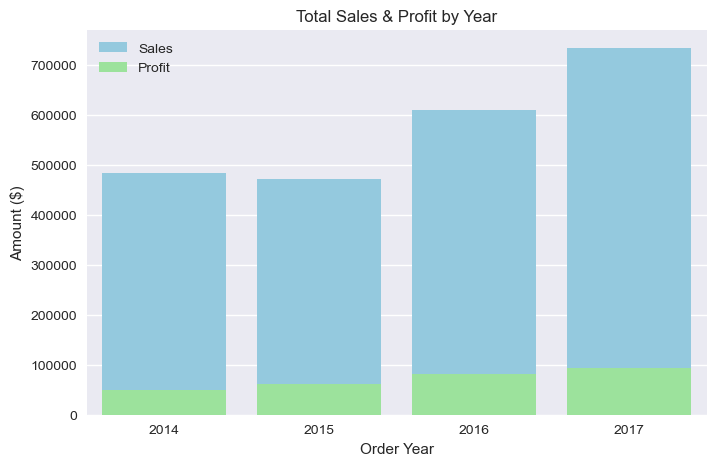

In [14]:
# Now Let's check how our Sales and Profit performed year by year:

# Firstly we Group data by year:

yearly_data = df.groupby('Order Year')[['Sales','Profit']].sum().reset_index()

# Then we Plot Sales & Profit by Year:

plt.figure(figsize=(8,5))
sns.barplot(x='Order Year', y='Sales', data=yearly_data, color="skyblue", label="Sales")
sns.barplot(x='Order Year', y='Profit', data=yearly_data, color="lightgreen", label="Profit")

plt.title("Total Sales & Profit by Year")
plt.ylabel("Amount ($)")
plt.legend()
plt.show()

According to the above Bar-Graph we can draw observations like:-

The Sales and profits steadily increased from 2014 (484k sales, 49k profit) to 2017 (733k sales, 93k profit).

The strongest year was 2017, showing the business is growing year-on-year.

And the continuous upward trends of sales and profit highlights expansion and improving operations.

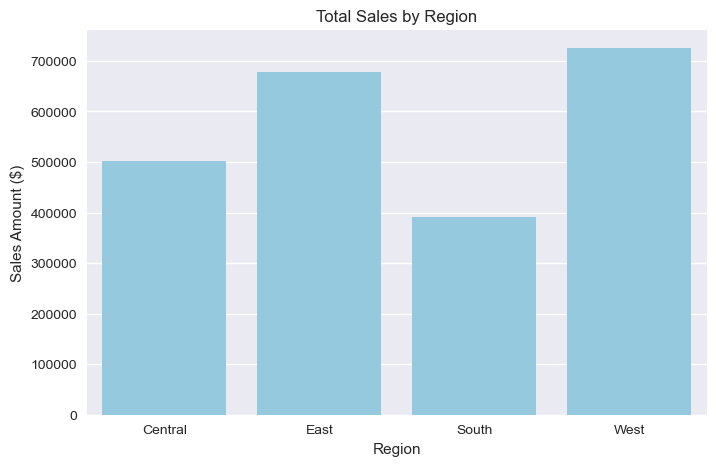

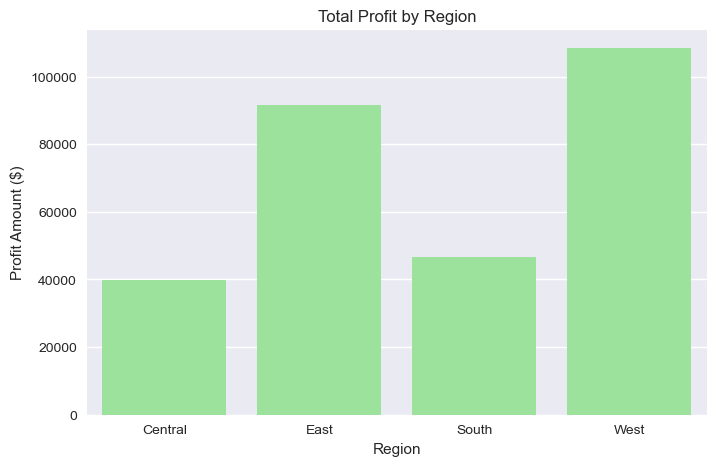

    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489


In [15]:
# Now Let's see how Sales are distributed across different Regions

# First we Group data by Region:

region_data = df.groupby('Region')[['Sales','Profit']].sum().reset_index()

# Then Plotting Sales by Region:

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=region_data, color="skyblue")

plt.title("Total Sales by Region")
plt.ylabel("Sales Amount ($)")
plt.show()

# Also we plot Profit by Region for better insights:

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Profit', data=region_data, color="lightgreen")

plt.title("Total Profit by Region")
plt.ylabel("Profit Amount ($)")
plt.show()

# At last we print the actual numbers for reference:

print(region_data)


From the above sales and profit Bar-Graphs by region, we draw insights that :

West region has the highest sales 725k and profit 108K.

Followed by East region closely with ~679K sales and ~91K profit.

Then comes Central region, although generating 501K sales, but still having the lowest profit 39K.

And at end, South region performed moderately with ~391K sales and ~46K profit.

👉 Therefore, The West and East regions are the company’s strongest markets, while Central still needs attention to improve profitability.

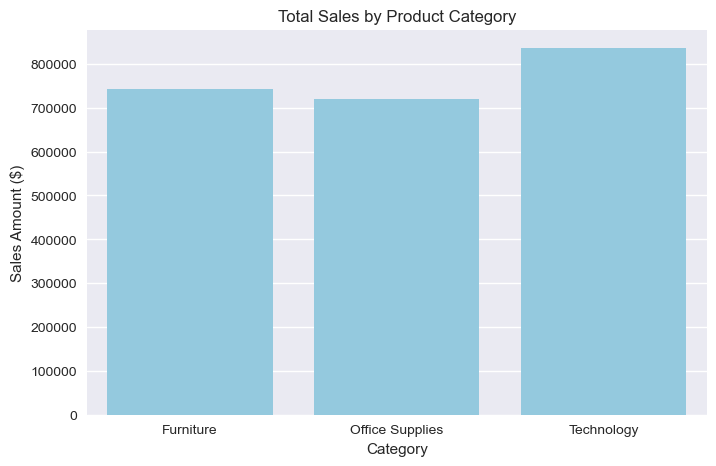

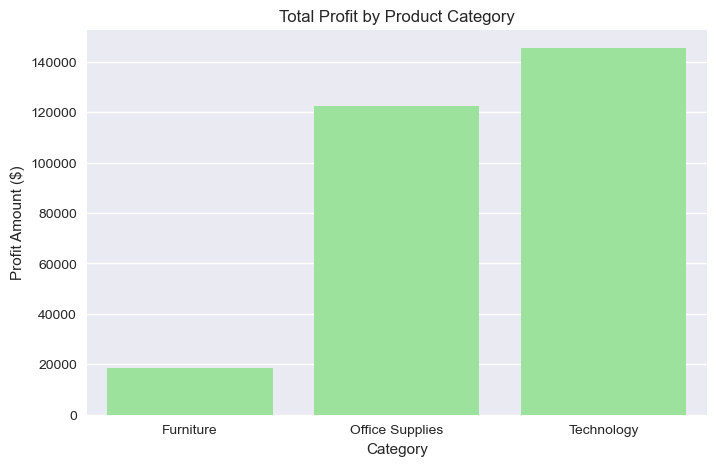

          Category        Sales       Profit
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008
2       Technology  836154.0330  145454.9481


In [16]:
# Now we analyze Sales and Profit across different Product Categories:

# First we Group data by Category:

category_data = df.groupby('Category')[['Sales','Profit']].sum().reset_index()

# Then Plotting Sales by Category:

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=category_data, color="skyblue")

plt.title("Total Sales by Product Category")
plt.ylabel("Sales Amount ($)")
plt.show()

# Secondly Plotting Profit by Category:

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=category_data, color="lightgreen")

plt.title("Total Profit by Product Category")
plt.ylabel("Profit Amount ($)")
plt.show()

# Finally we Print numbers for reference:

print(category_data)


From the above sales and profit by category graph, we can draw the insights that:

Technology with ~836K sales and generating ~145K profit becomes most profitable category.

After which, Office Supplies with ~719K sales and ~122K profit turns this category to be steady and reliable.

And Furniture along with ~742K sales but only ~18K profit shows high sales but extremely low margins.

👉 Therefore, Technology is the main growth driver, while Furniture is struggling in generating profits for the company.


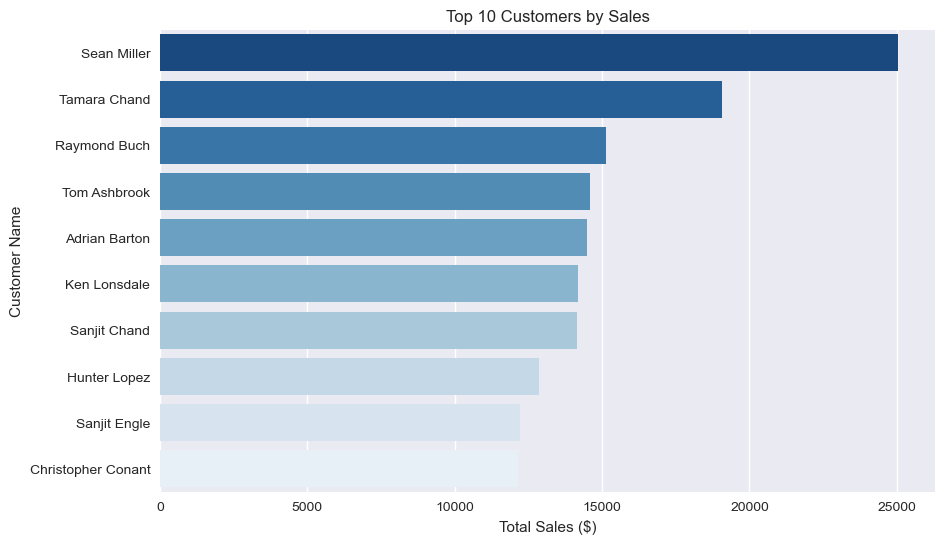

          Customer Name      Sales
686         Sean Miller  25043.050
730        Tamara Chand  19052.218
622        Raymond Buch  15117.339
757        Tom Ashbrook  14595.620
6         Adrian Barton  14473.571
441        Ken Lonsdale  14175.229
671        Sanjit Chand  14142.334
334        Hunter Lopez  12873.298
672        Sanjit Engle  12209.438
156  Christopher Conant  12129.072


In [17]:
# Now Let's find the Top 10 Customers based on their total Sales:

# First we group Customer Name and summing Sales:

top_customers = df.groupby('Customer Name')['Sales'].sum().reset_index()

# Then we Sort and pick top 10 among them:

top_customers = top_customers.sort_values(by='Sales', ascending=False).head(10)

# Plotting graph for Top 10 Customers:

plt.figure(figsize=(10,6))
sns.barplot(x='Sales', y='Customer Name', data=top_customers, palette="Blues_r")

plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Customer Name")
plt.show()

# And finally Printing the table for clarity:

print(top_customers)


Here in this Graph of Top 10 Customers by their sales, we get to observe that:

Sean Miller tops with ~25K in sales,

followed by Tamara Chand (~19K) and 

Raymond Buch (~15K).

And many other handful of customers contribute significantly to total revenue of the company

👉 This indicates strong customer relationships, but also some dependency risk on a few key (permanent) clients.

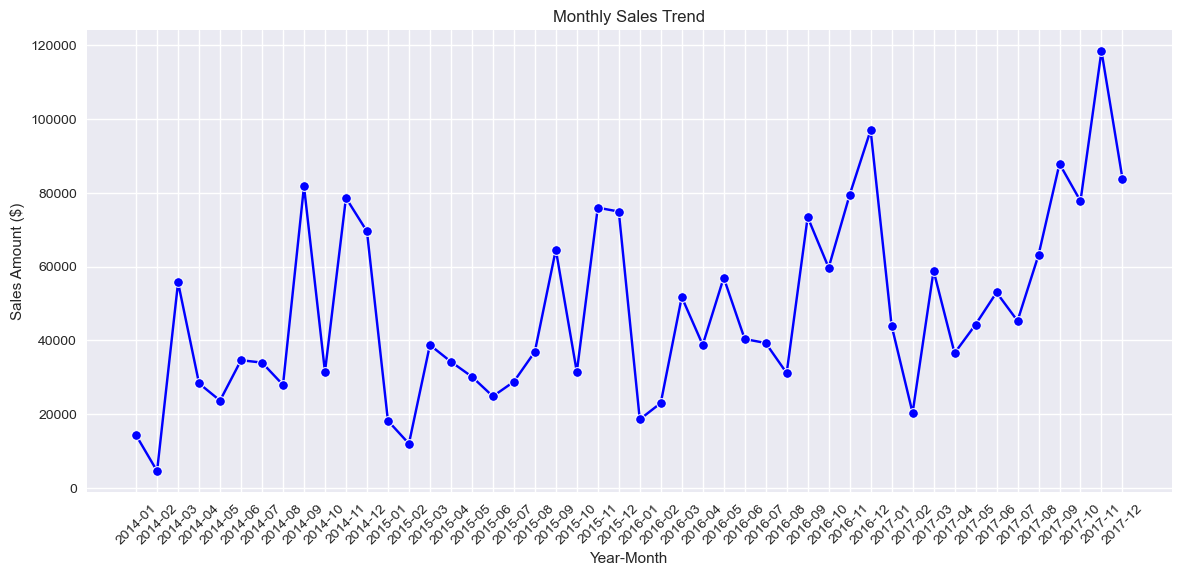

   Order Year  Order Month      Sales YearMonth
0        2014            1  14236.895   2014-01
1        2014            2   4519.892   2014-02
2        2014            3  55691.009   2014-03
3        2014            4  28295.345   2014-04
4        2014            5  23648.287   2014-05


In [18]:
# Let's now see how Sales trend looks month by month across years:

# Grouping them by Order Year and Order Month:

monthly_sales = df.groupby(['Order Year','Order Month'])['Sales'].sum().reset_index()

# Then creating a "Year-Month" column for better plotting:

monthly_sales['YearMonth'] = monthly_sales['Order Year'].astype(str) + "-" + monthly_sales['Order Month'].astype(str).str.zfill(2)

# Then plotting Monthly Sales Trend:

plt.figure(figsize=(14,6))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker="o", color="blue")

plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.ylabel("Sales Amount ($)")
plt.xlabel("Year-Month")
plt.show()

# Finally we Print first few rows for clarity:

print(monthly_sales.head())


From above chart,

Sales show seasonal peaks towards the end of each year, especially in November–December.

Therefore, This reflects holiday season shopping and indicates that inventory and marketing strategies should focus more around these months.

📌 Conclusion – Task 1

Through this analysis of the Sample Superstore dataset, we identified several key insights:


The business achieved total sales of 2.29M with the profits of 286K, with over 5,000 orders from 793 customers.

Sales and profits have grown steadily year-on-year, with 2017 being the strongest year.

West and East regions are the top-performing markets, while Central region shows weaker profit margins and still needs to be focussed on.

And among product categories, Technology leads both in sales and profit, while Furniture struggles with profitability despite good sales.

A small group of customers, including Sean Miller and Tamara Chand, contribute disproportionately to overall revenue.

Sales follow a seasonal trend, peaking during the holiday season at year-end.

👉 Overall, the company shows strong growth momentum, with opportunities to improve by:

Addressing profitability issues in the Furniture category.

Strengthening margins in the Central region.

Reducing dependency on a few high-value customers.

And with this we completed our Task 1 with a well-rounded analysis of KPIs, visualizations, and actionable insights. ✅

THANK YOU.